In [5]:
import os, sys

# go up one folder (from notebook → project root)
project_root = os.path.abspath("..")

# add that folder so Python can find src/
sys.path.append(project_root)

print("Project root added:", project_root)

Project root added: /workspaces/image-latent-representation


In [6]:
from src.dataset import TextureDataset
from src.autoencoder import AutoEncoder

In [7]:
print("Current working directory:", os.getcwd())
print("Does data/images exist?", os.path.exists("data/images"))
print("Does models/ae.pth exist?", os.path.exists("models/ae.pth"))

Current working directory: /workspaces/image-latent-representation/notebook
Does data/images exist? False
Does models/ae.pth exist? False


In [9]:
dataset = TextureDataset("../data/images")
print("Number of images:", len(dataset))
print("Number of classes:", len(dataset.classes))
print("First 5 classes:", dataset.classes[:5])

loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=0)

Number of images: 3360
Number of classes: 28
First 5 classes: ['grooved', 'crystalline', 'gauzy', 'blotchy', 'bubbly']


In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

model = AutoEncoder().to(device)
state = torch.load("../models/ae.pth", map_location=device)
model.load_state_dict(state)
model.eval()

print("Model loaded ✅")

Device: cpu
Model loaded ✅


In [12]:
embeddings = []
labels = []

with torch.no_grad():
    for imgs, lbls in loader:
        imgs = imgs.to(device)

        z = model.encoder(imgs)          # compress
        z = z.view(z.size(0), -1)        # flatten into vectors like [N, D]

        embeddings.append(z.cpu())
        labels.append(lbls)

embeddings = torch.cat(embeddings).numpy()
labels = torch.cat(labels).numpy()

print("Embeddings shape:", embeddings.shape)  # (num_images, embedding_dim)
print("Labels shape:", labels.shape)

Embeddings shape: (3360, 16384)
Labels shape: (3360,)


In [13]:
pca = PCA(n_components=2)
points_2d = pca.fit_transform(embeddings)

print("2D points shape:", points_2d.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

2D points shape: (3360, 2)
Explained variance ratio: [0.5095929  0.13956194]


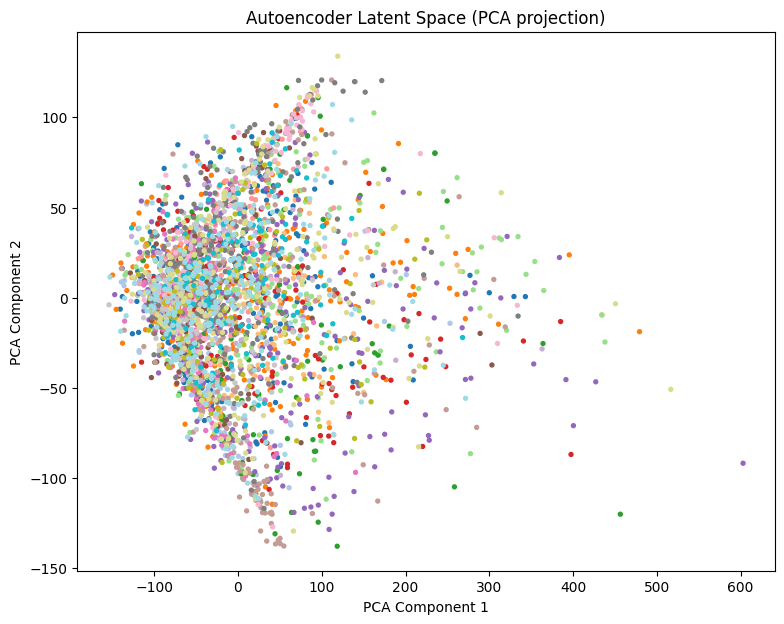

In [14]:
plt.figure(figsize=(9, 7))
plt.scatter(points_2d[:, 0], points_2d[:, 1], c=labels, cmap="tab20", s=8)
plt.title("Autoencoder Latent Space (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

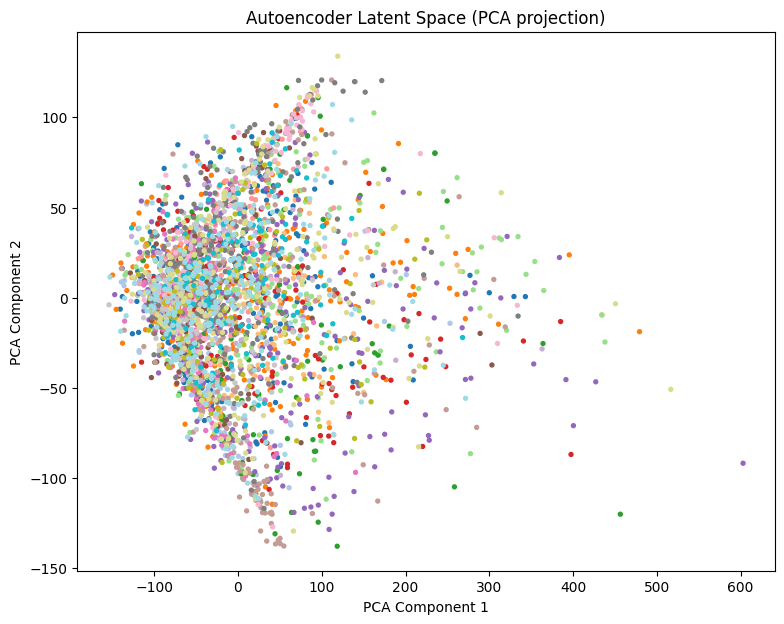

Saved: outputs/embedding_plot.png


In [15]:
os.makedirs("outputs", exist_ok=True)

plt.figure(figsize=(9, 7))
plt.scatter(points_2d[:, 0], points_2d[:, 1], c=labels, cmap="tab20", s=8)
plt.title("Autoencoder Latent Space (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

save_path = "outputs/embedding_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print("Saved:", save_path)